In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
warnings.simplefilter('ignore')

In [2]:
data_ = pd.read_csv('../Downloads/CarPrice_Assignment.csv')
data = data_.copy()


In [3]:
companies = []
for i in data['CarName']:
    st = i.split()
    companies.append(st[0])

In [4]:
data.insert(3,'CarBrand',value= companies)

In [5]:
data.replace({'toyouta':'toyota','vokswagen':'volkswagen','maxda':'mazda','porcshce':'porsche','Nissan':'nissan','vw':'volkswagen'},inplace=True)

In [6]:
pd.crosstab(data['carbody'],data['doornumber'])

doornumber,four,two
carbody,,
convertible,0,6
hardtop,0,8
hatchback,10,60
sedan,80,16
wagon,25,0


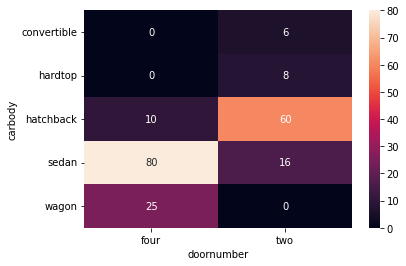

In [7]:
sns.heatmap(pd.crosstab(data['carbody'],data['doornumber']),annot = True)
plt.show()


In [8]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Since machine learning only understands numeric value hence we have to change categorical data to numerical values but one of the two methods
# 1. onehotencoder() or labelencoder()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   CarBrand          205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [11]:
data_obj = data.select_dtypes(include = ['object'])

In [12]:
data_obj

,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [13]:
data.isna().sum() #checks for null value
# since no null value , we can say that data is clean

car_ID              0
symboling           0
CarName             0
CarBrand            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
data_num = data.select_dtypes(exclude = 'object')

In [15]:
data_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
le = LabelEncoder()

In [17]:
data_obj

,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [18]:
for i in data_obj.columns:
    data[i] = le.fit_transform(data[i])

In [19]:
data

,car_ID,symboling,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,1,0,1,2,2,0,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,1,0,0,3,1,0,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,1,0,0,3,0,0,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,21,1,0,0,3,2,0,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,21,1,1,0,3,2,0,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,21,1,0,0,3,2,0,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,21,0,1,0,3,2,0,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# LabelEncoder Vs OneHotEncoder

In [20]:
'''
LabelEncoder:
works alphabetically for eg
two
four
since f comes before t , f will be given 0 and t will be given 1 
'''

'\nLabelEncoder:\nworks alphabetically for eg\ntwo\nfour\nsince f comes before t , f will be given 0 and t will be given 1 \n'

In [21]:
oh = OneHotEncoder()

In [22]:
data

,car_ID,symboling,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,1,0,1,2,2,0,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,1,0,0,3,1,0,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,1,0,0,3,0,0,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,21,1,0,0,3,2,0,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,21,1,1,0,3,2,0,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,21,1,0,0,3,2,0,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,21,0,1,0,3,2,0,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
x = data.iloc[:,:-1]

In [24]:
x

,car_ID,symboling,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,0,1,0,1,0,2,0,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,0,1,0,1,0,2,0,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,0,1,0,1,2,2,0,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,1,0,0,3,1,0,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,1,0,0,3,0,0,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,21,1,0,0,3,2,0,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138,21,1,1,0,3,2,0,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140,21,1,0,0,3,2,0,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,142,21,0,1,0,3,2,0,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [25]:
y = data.iloc[:,-1]

In [26]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [29]:
x_train

,car_ID,symboling,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
135,136,2,102,17,1,0,0,3,1,0,...,2,121,5,3.54,3.07,9.3,110,5250,21,28
134,135,3,103,17,1,0,1,2,1,0,...,2,121,5,2.54,2.07,9.3,110,5250,21,28
41,42,0,39,6,1,0,0,3,1,0,...,2,110,5,3.15,3.58,9.0,101,5800,24,28
161,162,0,115,19,1,0,0,2,1,0,...,2,98,1,3.19,3.03,9.0,70,4800,28,34
159,160,0,115,19,0,0,0,2,1,0,...,2,110,3,3.27,3.35,22.5,56,4500,38,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,21,1,0,0,3,2,0,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
184,185,2,133,20,0,0,0,3,1,0,...,2,97,3,3.01,3.40,23.0,52,4800,37,46
131,132,2,100,16,1,0,1,2,1,0,...,2,132,5,3.46,3.90,8.7,90,5100,23,31
152,153,1,116,19,1,0,0,2,1,0,...,2,92,1,3.05,3.03,9.0,62,4800,31,38


In [30]:
x_test

,car_ID,symboling,CarName,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
189,190,3,145,20,1,0,1,0,1,0,...,2,109,5,3.19,3.400,8.5,90,5500,24,29
183,184,2,130,20,1,0,1,3,1,0,...,2,109,5,3.19,3.400,9.0,85,5250,27,34
118,119,1,92,14,1,0,1,2,1,0,...,2,90,1,2.97,3.230,9.4,68,5500,37,41
165,166,1,114,19,1,0,1,3,2,0,...,2,98,5,3.24,3.080,9.4,112,6600,26,29
160,161,0,120,19,1,0,0,3,1,0,...,2,98,1,3.19,3.030,9.0,70,4800,38,47
70,71,-1,22,3,0,1,0,3,2,0,...,1,183,3,3.58,3.640,21.5,123,4350,22,25
173,174,-1,115,19,1,0,0,3,1,0,...,2,122,5,3.31,3.540,8.7,92,4200,29,34
154,155,0,117,19,1,0,0,4,0,0,...,2,92,1,3.05,3.030,9.0,62,4800,27,32
25,26,1,29,5,1,0,0,3,1,0,...,2,90,1,2.97,3.230,9.4,68,5500,31,38
71,72,-1,20,3,1,0,0,3,2,0,...,0,234,5,3.46,3.100,8.3,155,4750,16,18


In [31]:
y_train

135    15510.0
134    15040.0
41     12945.0
161     8358.0
159     7788.0
        ...   
200    16845.0
184     7995.0
131     9895.0
152     6488.0
106    18399.0
Name: price, Length: 164, dtype: float64

In [32]:
y_test

189    11595.0
183     7975.0
118     5572.0
165     9298.0
160     7738.0
70     31600.0
173     8948.0
154     7898.0
25      6692.0
71     34184.0
77      6189.0
146     7463.0
121     6692.0
102    14399.0
47     32250.0
188     9995.0
156     6938.0
38      9095.0
162     9258.0
141     7126.0
202    21485.0
103    13499.0
34      7129.0
3      13950.0
61     10595.0
115    16630.0
14     24565.0
46     11048.0
12     20970.0
101    13499.0
51      6095.0
6      17710.0
125    22018.0
73     40960.0
58     15645.0
182     7775.0
40     10295.0
72     35056.0
4      17450.0
130     9295.0
122     7609.0
Name: price, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
li = LinearRegression()

In [35]:
li.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pre = li.predict(x_test)

In [37]:
y_pre

array([10602.57524211,  8942.16716402,  5864.03077285,  7945.7149554 ,
        7105.41639466, 29761.79558485,  9433.90736871,  5371.28396866,
        6824.22605113, 34653.74936201,  5829.63300927,  7798.23665091,
        6122.9960726 , 22393.47238688, 27635.55005544, 10650.58522739,
        5221.37105235, 11073.407123  ,  5312.12338681,  8467.91629669,
       23536.29012686, 22967.77710117,  7321.69891288, 14621.95501549,
       10922.68984937, 14753.63148414, 20799.59768721, 10602.73698325,
       18487.41918031, 22333.45137739,  5728.51599506, 20028.1749076 ,
       15902.03758666, 42316.74010471, 13267.42252556,  8679.0822748 ,
       10820.27171248, 31242.16760261, 17034.63337681,  9266.77554771,
        7285.85354695])

In [38]:
y_test

189    11595.0
183     7975.0
118     5572.0
165     9298.0
160     7738.0
70     31600.0
173     8948.0
154     7898.0
25      6692.0
71     34184.0
77      6189.0
146     7463.0
121     6692.0
102    14399.0
47     32250.0
188     9995.0
156     6938.0
38      9095.0
162     9258.0
141     7126.0
202    21485.0
103    13499.0
34      7129.0
3      13950.0
61     10595.0
115    16630.0
14     24565.0
46     11048.0
12     20970.0
101    13499.0
51      6095.0
6      17710.0
125    22018.0
73     40960.0
58     15645.0
182     7775.0
40     10295.0
72     35056.0
4      17450.0
130     9295.0
122     7609.0
Name: price, dtype: float64

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_pre,y_test)

0.8835403780792219

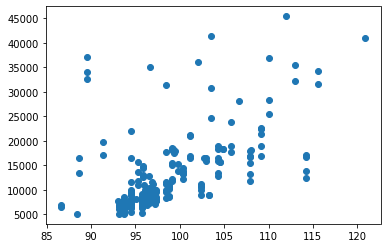

In [41]:
plt.scatter(data['wheelbase'],data['price'])
plt.show()

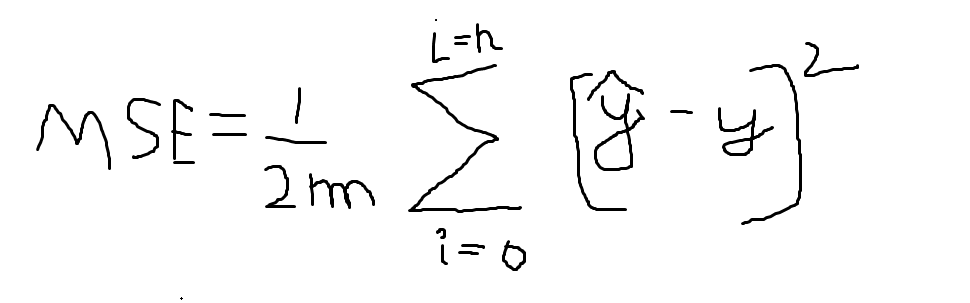

In [42]:
'''
MEAN-SQUARED ERROR:
also known as cost function/loss function 
where,
m = number of data points
y_cap = predicted
y = actual
'''

'\nMEAN-SQUARED ERROR:\nalso known as cost function/loss function \nwhere,\nm = number of data points\ny_cap = predicted\ny = actual\n'

In [43]:
'''
# Function to find m
def find_m(x,y):
    ans = []
    n = 
'''

'\n# Function to find m\ndef find_m(x,y):\n    ans = []\n    n = \n'

In [44]:
li.coef_

array([ 8.74304970e+01,  1.64844157e+01, -6.00815734e+00, -1.01012592e+03,
       -2.07920940e+03,  3.49053620e+02, -3.88436582e+02, -8.08008827e+02,
       -7.09948355e+02,  9.79949030e+03,  1.43928202e+02,  3.20884661e+01,
        2.57365628e+02,  3.01065148e+02,  1.95266566e+00,  2.72199520e+02,
        1.01468989e+03,  8.36215249e+01,  2.19550516e+01,  5.00355327e+02,
       -3.06046968e+03, -4.73168883e+01,  4.36158794e+01,  1.89497717e+00,
       -1.12888795e+02,  2.38200827e+02])

In [45]:
li.intercept_

-59588.827859832796

In [46]:
 from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mae = mean_absolute_error(y_pre,y_test)
mae

1996.623867022286

In [48]:
mse = mean_squared_error(y_pre, y_test)
mse

9458443.347421804

In [49]:
np.sqrt(mse)

3075.458233730675

In [50]:
'''
for linear regression, kam columns hone chahiye varna overfit hojayega
Regularisation techinques:
1. Ridge - zyada learning rate - turns value of m almost near to zero
2. Lasso - Kam learning rate - turns value of m to zero
'''

'\nfor linear regression, kam columns hone chahiye varna overfit hojayega\nRegularisation techinques:\n1. Ridge - zyada learning rate - turns value of m almost near to zero\n2. Lasso - Kam learning rate - turns value of m to zero\n'

In [51]:
from sklearn.linear_model import Ridge,Lasso

In [52]:
rd = Ridge()
la = Lasso()

In [53]:
rd.fit(x_train,y_train)

Ridge()

In [54]:
rd_pre = rd.predict(x_test)

In [55]:
rd_pre

array([11389.01286578,  8879.83772446,  5663.96959207,  8211.93577287,
        6714.73691825, 29311.04862768,  8970.61835453,  5414.26076577,
        6779.68731862, 34522.09491244,  5746.14861819,  7483.7580977 ,
        6031.32847133, 23012.18198593, 27474.72278578, 11188.32544141,
        4998.08923802, 11135.43379718,  5079.30422273,  8345.08909512,
       23671.48980696, 23651.91476621,  7564.42290322, 14928.25127214,
       10570.41842042, 14323.01090483, 20722.67522399, 10595.16415186,
       18367.76107134, 23082.52049957,  5673.14330003, 19527.33068614,
       16229.2516866 , 42631.60284669, 13719.46258914,  8688.43101554,
       11386.10286306, 31552.14733567, 17236.6260965 ,  9178.01695668,
        7193.36127088])

In [56]:
r2_score(rd_pre,y_test)

0.873985843040071

In [57]:
la.fit(x_train,y_train)

Lasso()

In [58]:
la_pre = la.predict(x_test)

In [59]:
la_pre

array([10569.59723537,  8932.19986027,  5841.85116674,  7934.78878846,
        7038.1280882 , 29754.34660964,  9432.90127593,  5387.58800825,
        6854.69468651, 34652.18167748,  5839.86045835,  7762.47225926,
        6112.47935557, 22437.90224804, 27655.29488369, 10714.64028878,
        5196.19884656, 11072.32477241,  5294.28141359,  8446.58989784,
       23458.21996313, 22982.16361357,  7335.39315565, 14732.27716509,
       10899.2410272 , 14753.08636078, 20857.52679247, 10703.3294678 ,
       18555.80318625, 22365.75620881,  5732.80885457, 20010.8211326 ,
       15927.24959289, 42296.34774403, 13280.16550169,  8656.94807563,
       10851.12117367, 31229.81981714, 17046.91617379,  9291.91522105,
        7281.06182969])

In [60]:
r2_score(la_pre,y_test)


0.8834981804705297

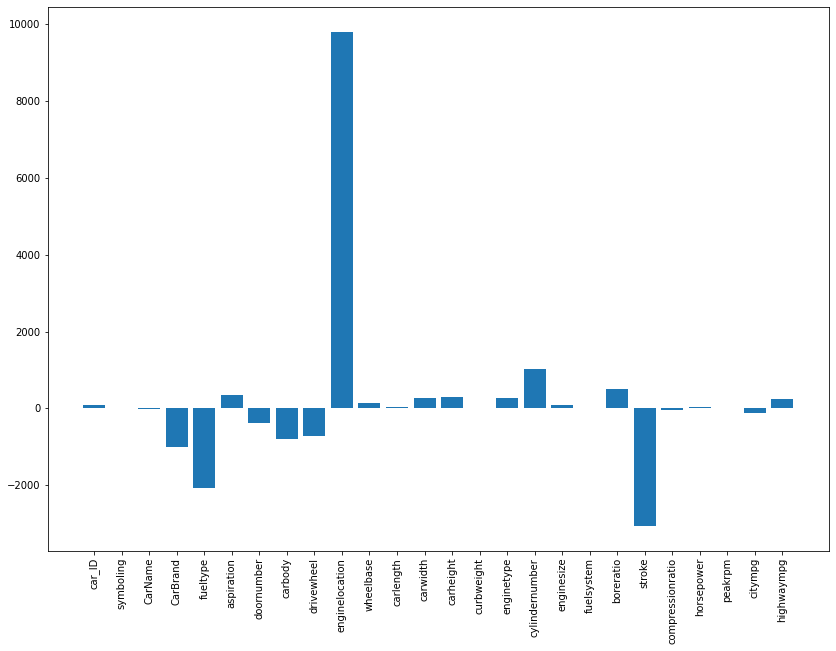

In [61]:
plt.figure(figsize=(14,10))
plt.bar(x.columns,li.coef_)
plt.xticks(rotation=90)
plt.show()

In [74]:
data.corr()['price']

CarBrand         -0.262234
aspiration        0.177926
drivewheel        0.577992
enginelocation    0.324973
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
carheight         0.119336
curbweight        0.835305
enginesize        0.874145
fuelsystem        0.526823
boreratio         0.553173
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Name: price, dtype: float64

In [75]:
data.drop(['car_ID','symboling','CarName','fueltype','doornumber','carbody','enginetype','cylindernumber','stroke','compressionratio','peakrpm' ],axis=1,inplace=True)

KeyError: "['car_ID', 'symboling', 'CarName', 'fueltype', 'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'stroke', 'compressionratio', 'peakrpm'] not found in axis"

In [ ]:
data


In [ ]:
from sklearn.linear_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [ ]:
li.fit(x_train,y_train)

In [76]:
#new

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('../Downloads/heart.csv')

In [92]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [93]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [94]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [95]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [119]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [121]:
lor.fit(x_train,y_train)

LogisticRegression()

In [122]:
y_pre=lor.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_pre,y_test)

0.7853658536585366

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [126]:
confusion_matrix(y_pre,y_test)

array([[71, 13],
       [31, 90]], dtype=int64)

In [127]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.70      0.85      0.76        84
           1       0.87      0.74      0.80       121

    accuracy                           0.79       205
   macro avg       0.78      0.79      0.78       205
weighted avg       0.80      0.79      0.79       205



In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('../Downloads/play_tennis.csv')

In [137]:
df1

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics
import statsmodels.api as sm
import plotly.express as px #for plotting the scatter plot
import seaborn as sns #For plotting the dataset in seaborn
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('../Downloads/play_tennis.csv')
print(data.head(5))
print(data.describe())

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes
       day outlook  temp humidity  wind play
count   14      14    14       14    14   14
unique  14       3     3        2     2    2
top     D1   Sunny  Mild     High  Weak  Yes
freq     1       5     6        7     8    9


In [3]:
print(data.columns)
data.isnull().any()
data=data.drop(['day'],axis=1)

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [4]:
le = LabelEncoder()
data['outlook_encoded']= le.fit_transform(data['outlook'])
data['temp_encoded']= le.fit_transform(data['temp'])
data['humidity_encoded']= le.fit_transform(data['humidity'])
data['wind_encoded']= le.fit_transform(data['wind'])
data['play_encoded']= le.fit_transform(data['play'])
print(data.head(5))

    outlook  temp humidity    wind play  outlook_encoded  temp_encoded  \
0     Sunny   Hot     High    Weak   No                2             1   
1     Sunny   Hot     High  Strong   No                2             1   
2  Overcast   Hot     High    Weak  Yes                0             1   
3      Rain  Mild     High    Weak  Yes                1             2   
4      Rain  Cool   Normal    Weak  Yes                1             0   

   humidity_encoded  wind_encoded  play_encoded  
0                 0             1             0  
1                 0             0             0  
2                 0             1             1  
3                 0             1             1  
4                 1             1             1  


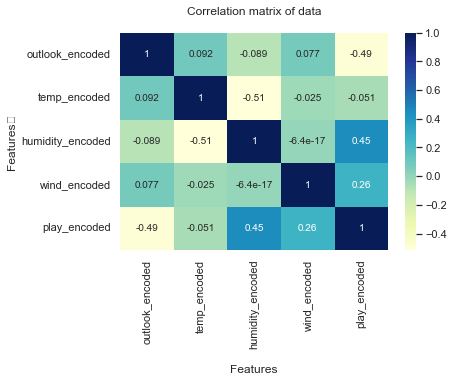

In [5]:
cols=['outlook_encoded','temp_encoded','humidity_encoded','wind_encoded','play_encoded']
cor=data[cols].corr()
hm1 = sns.heatmap(cor, annot = True,cmap='YlGnBu')
hm1.set(xlabel='\nFeatures', ylabel='Features\t', title = "Correlation matrix of data\n")
plt.show()

In [6]:
features=['outlook_encoded', 'temp_encoded', 'humidity_encoded','wind_encoded']
x=data[features]
y=data['play_encoded']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=1)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(11, 4)

Shape of x_test:
(3, 4)

Shape of y_train:
(11,)

Shape of y_test:
(3,)


    outlook_encoded  temp_encoded  humidity_encoded  wind_encoded
2                 0             1                 0             1
10                2             2                 1             0
4                 1             0                 1             1
1                 2             1                 0             0
12                0             1                 1             1
0                 2             1                 0             1
13                1             2                 0             0
9                 1             2                 1             1
8                 2             0                 1             1
11                0             2                 0             0
5                 1             0                 1             0
____________________________________________________________________________
 [[-1.3764944  -0.11470787 -1.09544512  0.91287093]
 [ 1.14707867  1.14707867  0.91287093 -1.09544512]
 [-0.11470787 -1.3764944   0

Text(0.5, 1.08, 'Pair Plot of the dataset After scaling')

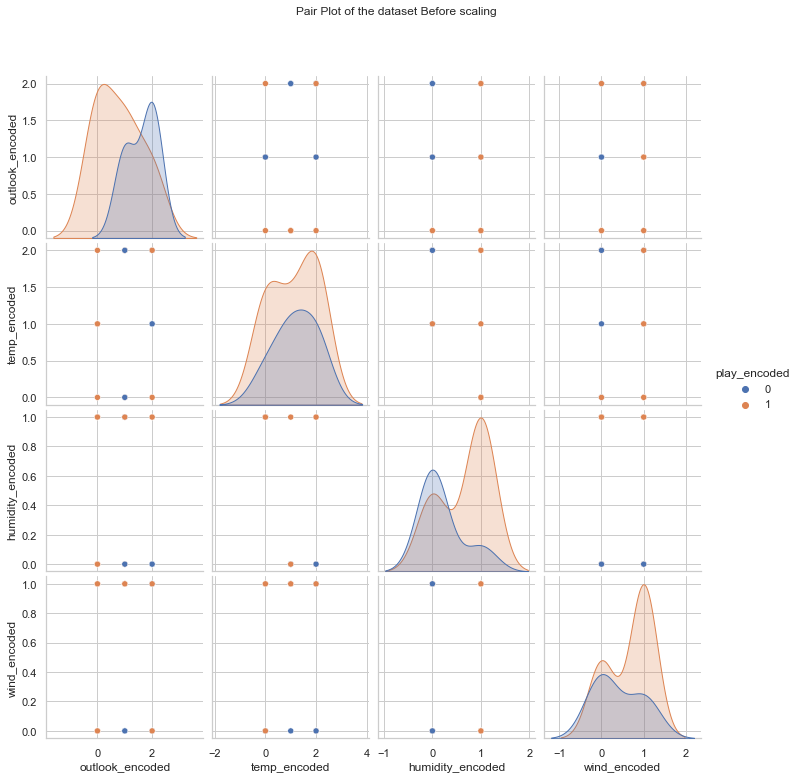

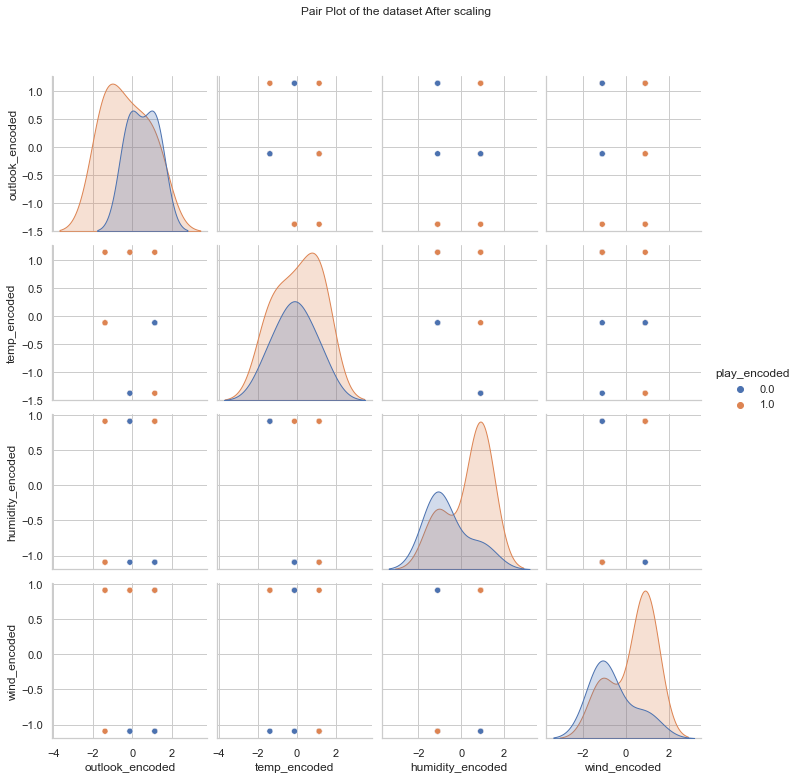

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)
print(x_train)
print("____________________________________________________________________________")
print("",scaled_x_train)

before= sns.pairplot(data[cols], hue= 'play_encoded')
before.fig.suptitle('Pair Plot of the dataset Before scaling', y=1.08)

data2= pd.DataFrame(data= np.c_[scaled_x_train, y_train],
columns= features + ['play_encoded'])
after= sns.pairplot(data2, hue= 'play_encoded')
after.fig.suptitle('Pair Plot of the dataset After scaling', y=1.08)

In [8]:
x_train=scaled_x_train
x_test=scaled_x_test
model = GaussianNB()
model.fit(x_train, y_train)
y_prediction= model.predict(x_test)
report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values']= y_prediction
print(report)

   Actual values  Predicted values
3              1                 1
7              0                 1
6              1                 1


[[0 1]
 [0 2]]


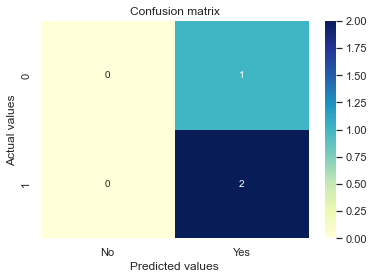

In [9]:
ConfusionMatrix=confusion_matrix(y_test,y_prediction)
print(ConfusionMatrix)
ax=sns.heatmap(ConfusionMatrix,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

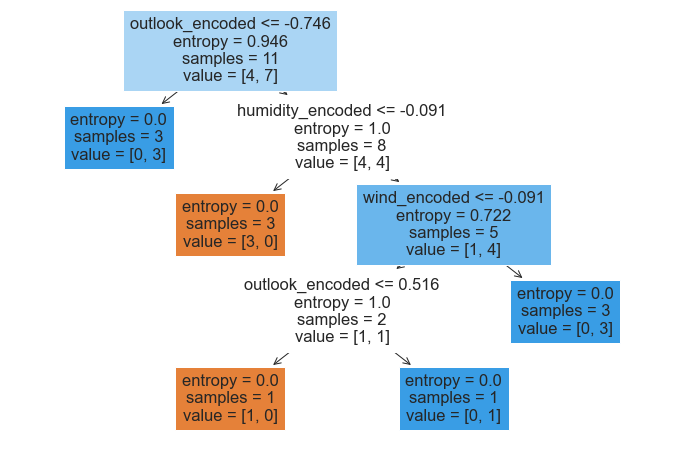

In [16]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt,filled=True, feature_names=x.columns)
plt.show()